In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset
df = pd.read_csv("leads.csv")

# Quick look
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LeadID      1000 non-null   object
 1   LeadSource  1000 non-null   object
 2   Industry    1000 non-null   object
 3   Contacted   1000 non-null   int64 
 4   FollowUps   1000 non-null   int64 
 5   LeadScore   1000 non-null   int64 
 6   Region      1000 non-null   object
 7   Converted   1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


LeadID        0
LeadSource    0
Industry      0
Contacted     0
FollowUps     0
LeadScore     0
Region        0
Converted     0
dtype: int64

In [3]:
df = df.dropna()  # or df.fillna('Unknown')


In [4]:
df_encoded = df.copy()

encoders = {}
for col in ['LeadSource', 'Industry', 'Region']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

In [5]:
df_encoded.head()


,LeadID,LeadSource,Industry,Contacted,FollowUps,LeadScore,Region,Converted
0,LEAD0001,0,3,1,4,72,2,1
1,LEAD0002,2,3,1,2,98,3,0
2,LEAD0003,3,3,0,8,98,0,1
3,LEAD0004,2,3,1,8,23,3,0
4,LEAD0005,2,0,1,5,42,2,0


In [6]:
X = df_encoded.drop(columns=['LeadID', 'Converted'])
y = df_encoded['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 66.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        81
           1       0.69      0.76      0.73       119

    accuracy                           0.66       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.66      0.65       200



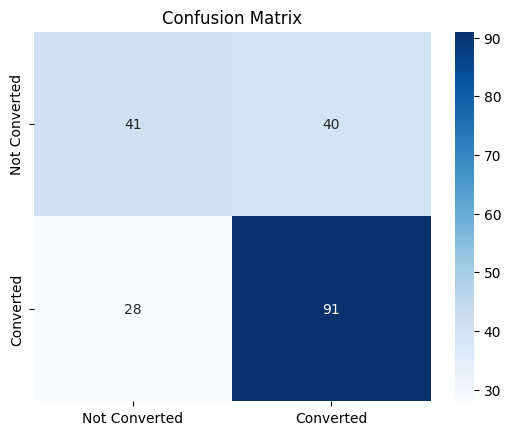

In [8]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title("Confusion Matrix")
plt.show()


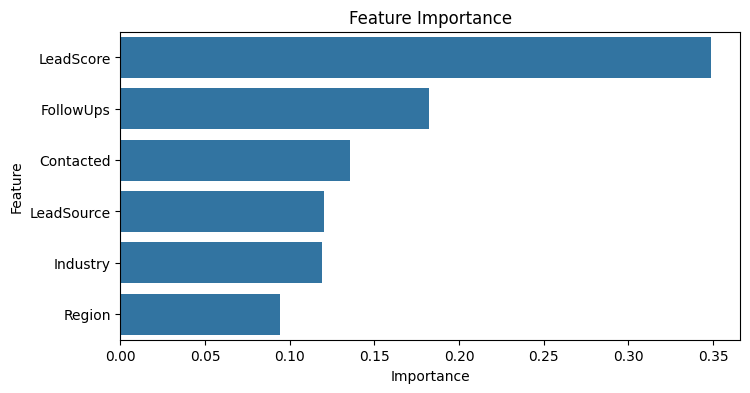

In [9]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()


In [11]:
input_data = pd.DataFrame({
    'LeadSource': ['Website'],
    'Industry': ['IT Services'],
    'Contacted': [1],
    'FollowUps': [3],
    'LeadScore': [75],
    'Region': ['North']
})

# Encode using same encoders
for col in ['LeadSource', 'Industry', 'Region']:
    le = encoders[col]
    input_data[col] = input_data[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Predict probability
prob = model.predict_proba(input_data)[0][1]
print(f"Probability of Conversion: {prob:.2%}")

if prob > 0.5:
    print("✅ Likely to Convert")
else:
    print("❌ Unlikely to Convert")


Probability of Conversion: 89.50%
✅ Likely to Convert
